In [32]:
"""
Raw_data
"""
%matplotlib inline
import pandas
import numpy
#from scipy.stats import mode
from sklearn import neighbors
from sklearn.neighbors import DistanceMetric 
from pprint import pprint
import scipy.stats as sp
import matplotlib.pyplot as plt

T_TRAIN = 'raw_data/train_titanic.csv'
T_TEST = 'raw_data/test_titanic.csv'

titanic_train = pandas.read_csv(T_TRAIN, header=0)

Describe the data.
> How big?
> What are the columns and what do they mean?

In [33]:
print('Length:\n\t{0} rows'.format(len(titanic_train)))
print('Columns:\n\t{0}'.format(titanic_train.columns))

Length:
	891 rows
Columns:
	Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


What’s the average age of...
> any Titanic passenger
> a survivor
> a non-surviving first-class passenger
> Male survivors older than 30 from anywhere but Queenstown
> For the groups you chose, how far (in years) are the average ages from the median ages?

In [34]:
avg_age_all = titanic_train['Age'].mean()
print('Average Age: Passenger\n\t{0}'.format(avg_age_all))

ave_age_survivor = titanic_train.loc[titanic_train['Survived'] == 1]['Age'].mean()
print('Average Age: Survivor\n\t{0}'.format(ave_age_survivor))

# Non-Survivor
ns = titanic_train.loc[titanic_train['Survived'] == 0]
# Non-Survivor First Class
ns_fc = ns.loc[ns['Pclass'] == 1] 
# Average Age of Non-Survivor First Class
ave_age_of_ns_fc = ns_fc["Age"].mean()
print('Average Age: Non-Survivor, First-class\n\t{0}'.format(ave_age_of_ns_fc))

survivors = titanic_train.loc[
    (titanic_train['Survived'] == 1) &
    (titanic_train['Sex'] == 'male') &
    (titanic_train['Age'] > 30) &
    (titanic_train['Embarked'] != 'Q')]
avg_age_not_q_male_survivor_over_30= survivors['Age'].mean()
print('Average Age: Male Survivor, > 30, not Queenstown\n\t{0}'.format(avg_age_not_q_male_survivor_over_30))

ages = titanic_train['Age'][1]
median_age = numpy.median(ages)
print('Median Age:\n\t{0}'.format(median_age))
print('Average from median Age: \n\t{0}'.format(median_age - avg_age_all))

Average Age: Passenger
	29.69911764705882
Average Age: Survivor
	28.343689655172415
Average Age: Non-Survivor, First-class
	43.6953125
Average Age: Male Survivor, > 30, not Queenstown
	41.48780487804878
Median Age:
	38.0
Average from median Age: 
	8.30088235294118


What’s the most common...
> passenger class
> port of Embarkation
> number of siblings or spouses aboard for survivors

In [35]:
pclass_column = titanic_train['Pclass']
pclass_column = pclass_column.dropna()
md = sp.mode(pclass_column)
print('The mode of the passenger class was: {}'.format(md[0]))

emb_column = titanic_train['Embarked']
emb_column = emb_column.dropna()
emb_column = emb_column.map({'C':1, 'S':2, 'Q':3}).astype(int)
md = sp.mode(emb_column)
print('The mode of embarcation int value was: {}'.format(md[0]))

survivors = titanic_train.loc[titanic_train['Survived'] == 1]
sib_col = survivors['SibSp']
md = sp.mode(sib_col)
print('The mode of siblings/spouses of survivors aboard was: {}'.format(md[0]))

The mode of the passenger class was: [3]
The mode of embarcation int value was: [2]
The mode of siblings/spouses of survivors aboard was: [0]


The most common port of embarcation is Southampton

> Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price?
> Is it above or below the mean?

In [36]:
s_dev = numpy.std(titanic_train['Fare'], ddof=1)
t_mean = titanic_train['Fare'].mean()
t_med = titanic_train['Fare'].median()
print('The standard deviation is: {}'.format(s_dev))
print('The mean price is: {}'.format(t_mean))
print('The median price is: {}'.format(t_med))

The standard deviation is: 49.693428597180905
The mean price is: 32.2042079685746
The median price is: 14.4542


The median ticket price is within 0-1 standard deviations from the mean.

> How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?
> The highest average ticket price was paid by passengers from which port? Null ports don’t count

In [37]:
perc_90 = numpy.percentile(titanic_train['Fare'], 90)
perc_5 = numpy.percentile(titanic_train['Fare'], 5)
print('The 90th percentile cost is: ${}'.format(perc_90))
print('The 5th percentile cost is: ${}'.format(perc_5))

class_90 = titanic_train.loc[titanic_train['Fare'] >= perc_90]
class_5 = titanic_train.loc[titanic_train['Fare'] <= perc_5]

print('90% fare lowest class = {}'.format(class_90['Pclass'].max()))
print('90% fare highest class = {}'.format(class_90['Pclass'].min()))
print('5% fare lowest class = {}'.format(class_5['Pclass'].max()))
print('5% fare highest class = {}'.format(class_5['Pclass'].min()))

perc_5_class_1 = titanic_train.loc[(titanic_train['Fare'] <= perc_5) & (titanic_train['Pclass'] == 1)]
perc_5_class_2 = titanic_train.loc[(titanic_train['Fare'] <= perc_5) & (titanic_train['Pclass'] == 2)]
perc_5_class_3 = titanic_train.loc[(titanic_train['Fare'] <= perc_5) & (titanic_train['Pclass'] == 3)]

print('There were {} people in the 5% fare group in first class.'.format(len(perc_5_class_1)))
print('There were {} people in the 5% fare group in second class.'.format(len(perc_5_class_2)))
print('There were {} people in the 5% fare group in third class.'.format(len(perc_5_class_3)))

port_fare = titanic_train[['Embarked','Fare']]
port_fare = port_fare.dropna()
port_c = port_fare.loc[port_fare['Embarked'] == 'C']
port_q = port_fare.loc[port_fare['Embarked'] == 'Q']
port_s = port_fare.loc[port_fare['Embarked'] == 'S']

port_c_mean = port_c.mean()
port_q_mean = port_q.mean()
port_s_mean = port_s.mean()

The 90th percentile cost is: $77.9583
The 5th percentile cost is: $7.225
90% fare lowest class = 1
90% fare highest class = 1
5% fare lowest class = 3
5% fare highest class = 1
There were 6 people in the 5% fare group in first class.
There were 6 people in the 5% fare group in second class.
There were 43 people in the 5% fare group in third class.


The highest ticket price served the Cherbourg port.

> Which port has passengers from the most similar passenger class?

In [38]:
port_s = titanic_train.loc[(titanic_train['Embarked'] == 'S')]
port_c = titanic_train.loc[(titanic_train['Embarked'] == 'C')]
port_q = titanic_train.loc[(titanic_train['Embarked'] == 'Q')]

port_s_sdev = port_s.std()
port_c_sdev = port_c.std()
port_q_sdev = port_q.std()

Queenstown has the most passengers of a similar class.


> Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles. Make sure you label your axes.

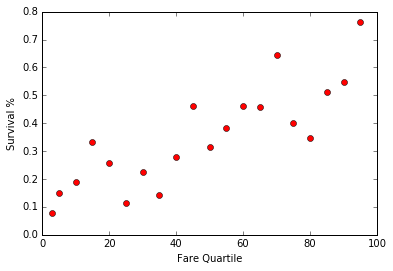

In [39]:
quartile_list = [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
survived = []
total = []
percentage = []
prev_cost = 0

for quartile in quartile_list:
    ticket = numpy.percentile(titanic_train['Fare'], quartile)
    survivors = titanic_train.loc[(titanic_train['Survived'] == 1) & (titanic_train['Fare'] <= ticket) & (titanic_train['Fare'] > prev_cost)]
    total_passengers = titanic_train.loc[(titanic_train['Fare'] <= ticket) & (titanic_train['Fare'] > prev_cost)]
    survived.append(len(survivors))
    total.append(len(total_passengers))
    perc = len(survivors) / len(total_passengers)
    percentage.append(perc)
    prev_cost = ticket

plt.plot(quartile_list, percentage, 'ro')
plt.ylabel('Survival %')
plt.xlabel('Fare Quartile')
plt.show()

>  What fraction of surviving 1st-class males paid lower than the overall median ticket price?

In [40]:
overall_fare = titanic_train['Fare'][1]
overall_median = numpy.median(overall_fare)
print(overall_median)
male_lower_median = titanic_train.loc[(titanic_train['Pclass'] == 1)&
                                      (titanic_train['Survived'] == 1)&
                                      (titanic_train['Sex'] == 'male')&
                                      (titanic_train['Fare'] < overall_median)]
lower_count = male_lower_median.count()
print(lower_count[0])
# take id to count total number
all_1st_class_male_survivor = titanic_train.loc[(titanic_train['Pclass'] == 1)&
                                      (titanic_train['Survived'] == 1)&
                                      (titanic_train['Sex'] == 'male')]
total_count = all_1st_class_male_survivor.count()
print(total_count[0])
                                
print(lower_count[0], "/", total_count[0])


71.2833
31
45
31 / 45


>  How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?

In [41]:
survive_w_sibsp_parch = titanic_train.loc[(titanic_train['Survived'] == 1)&
                                       (titanic_train['SibSp'] > 0)&
                                       (titanic_train['Parch'] > 0)] 
avg_age_survivor_family = survive_w_sibsp_parch['Age'].mean()
print(avg_age_survivor_family)
non_survivor_wo_family = titanic_train.loc[(titanic_train['Survived'] == 0)&
                                           (titanic_train['SibSp'] == 0)&
                                           (titanic_train['Parch'] == 0)]
avg_age_non_survivor_wo_family = non_survivor_wo_family['Age'].mean()
print(avg_age_non_survivor_wo_family)
diff = abs(avg_age_survivor_family - avg_age_non_survivor_wo_family)
print(diff)

20.71050847457627
32.41423357664234
11.70372510206607


*STRETCH GOAL* 
For each of the following characteristics, find the median in the data.
> age
> ticket price
> siblings/spouses
> parents/children

If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?